### Анализируем занятое пространство на Диске С

In [1]:
%pwd

'D:\\PycharmProjects\\explore_filesystem'

In [13]:
import file_size
from pprint import pprint
import numpy as np
from matplotlib import pyplot as plt

path = "C:/Program Files/"
items = file_size.explore_dir(path)
# pprint(items)

N = len(items[path])
print("Total:", N, "\n")
file_size.pretty_print_info(items[path])


Searching for  C_Program Files_ 

Everything is up to date
Total: 88 

CMake.lnk                 lnk     1.080  Kib
desktop.ini               ini     0.169  Kib
IntelliJ IDEA 2019.2.4    4       1.320  Mib
Microsoft Visual Studi    0       4.736  Kib
Microsoft.NET             net     678.1  Kib
PyCharm 2019.2            2       951.0  Mib
Python3.8.1               1       159.0  Mib
STM32CubeIDE_1.3.0        0       2.118  Gib
TrueSTUDIO for STM32 9    0       2.028  Gib
Ultimaker Cura 4.4        4       556.1  Mib
--------------------------------------------
Application Verifier      dir     346.4  Kib
Bonjour                   dir     599.5  Kib
boost_1_71_0              dir     2.332  Gib
Borderlands 2 Remaster    dir     26.65  Gib
CMake                     dir     79.28  Mib
Common Files              dir     315.6  Mib
Corel                     dir     24.08  Mib
CorelDRAW Graphics Sui    dir     1.576  Gib
CPUID                     dir     4.271  Mib
DAEMON Tools Pro          dir

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
[354721, 613987, 2504431056, 28623938987, 83140342, 1106, 330939314, 25257304, 1692920254, 4479294, 38304346, 174, 3442592, 3586518205, 8263895867, 206579548, 133529702, 1173335475, 672629648, 3494423083, 70419784175, 8053777, 0, 23823398, 1385083, 1822874, 208408365, 5875684779, 5730529227, 3370799247, 7853967, 243829504, 13975985888, 2818981461, 8684384, 624474702, 4850, 694464, 206269219, 40280492, 25757, 21110842, 1135102554, 12691659, 1489736804, 3022259930, 1159733118, 9941731097, 14032945535, 86254418, 997205133, 166825478, 39454889, 59493230, 388774473, 20735810290, 5462055, 908267534, 119260605, 2274315797, 439235073, 169386828, 77019453, 261273214, 43089505318, 0, 2178219242, 583143907, 0, 2223561715, 26457094, 

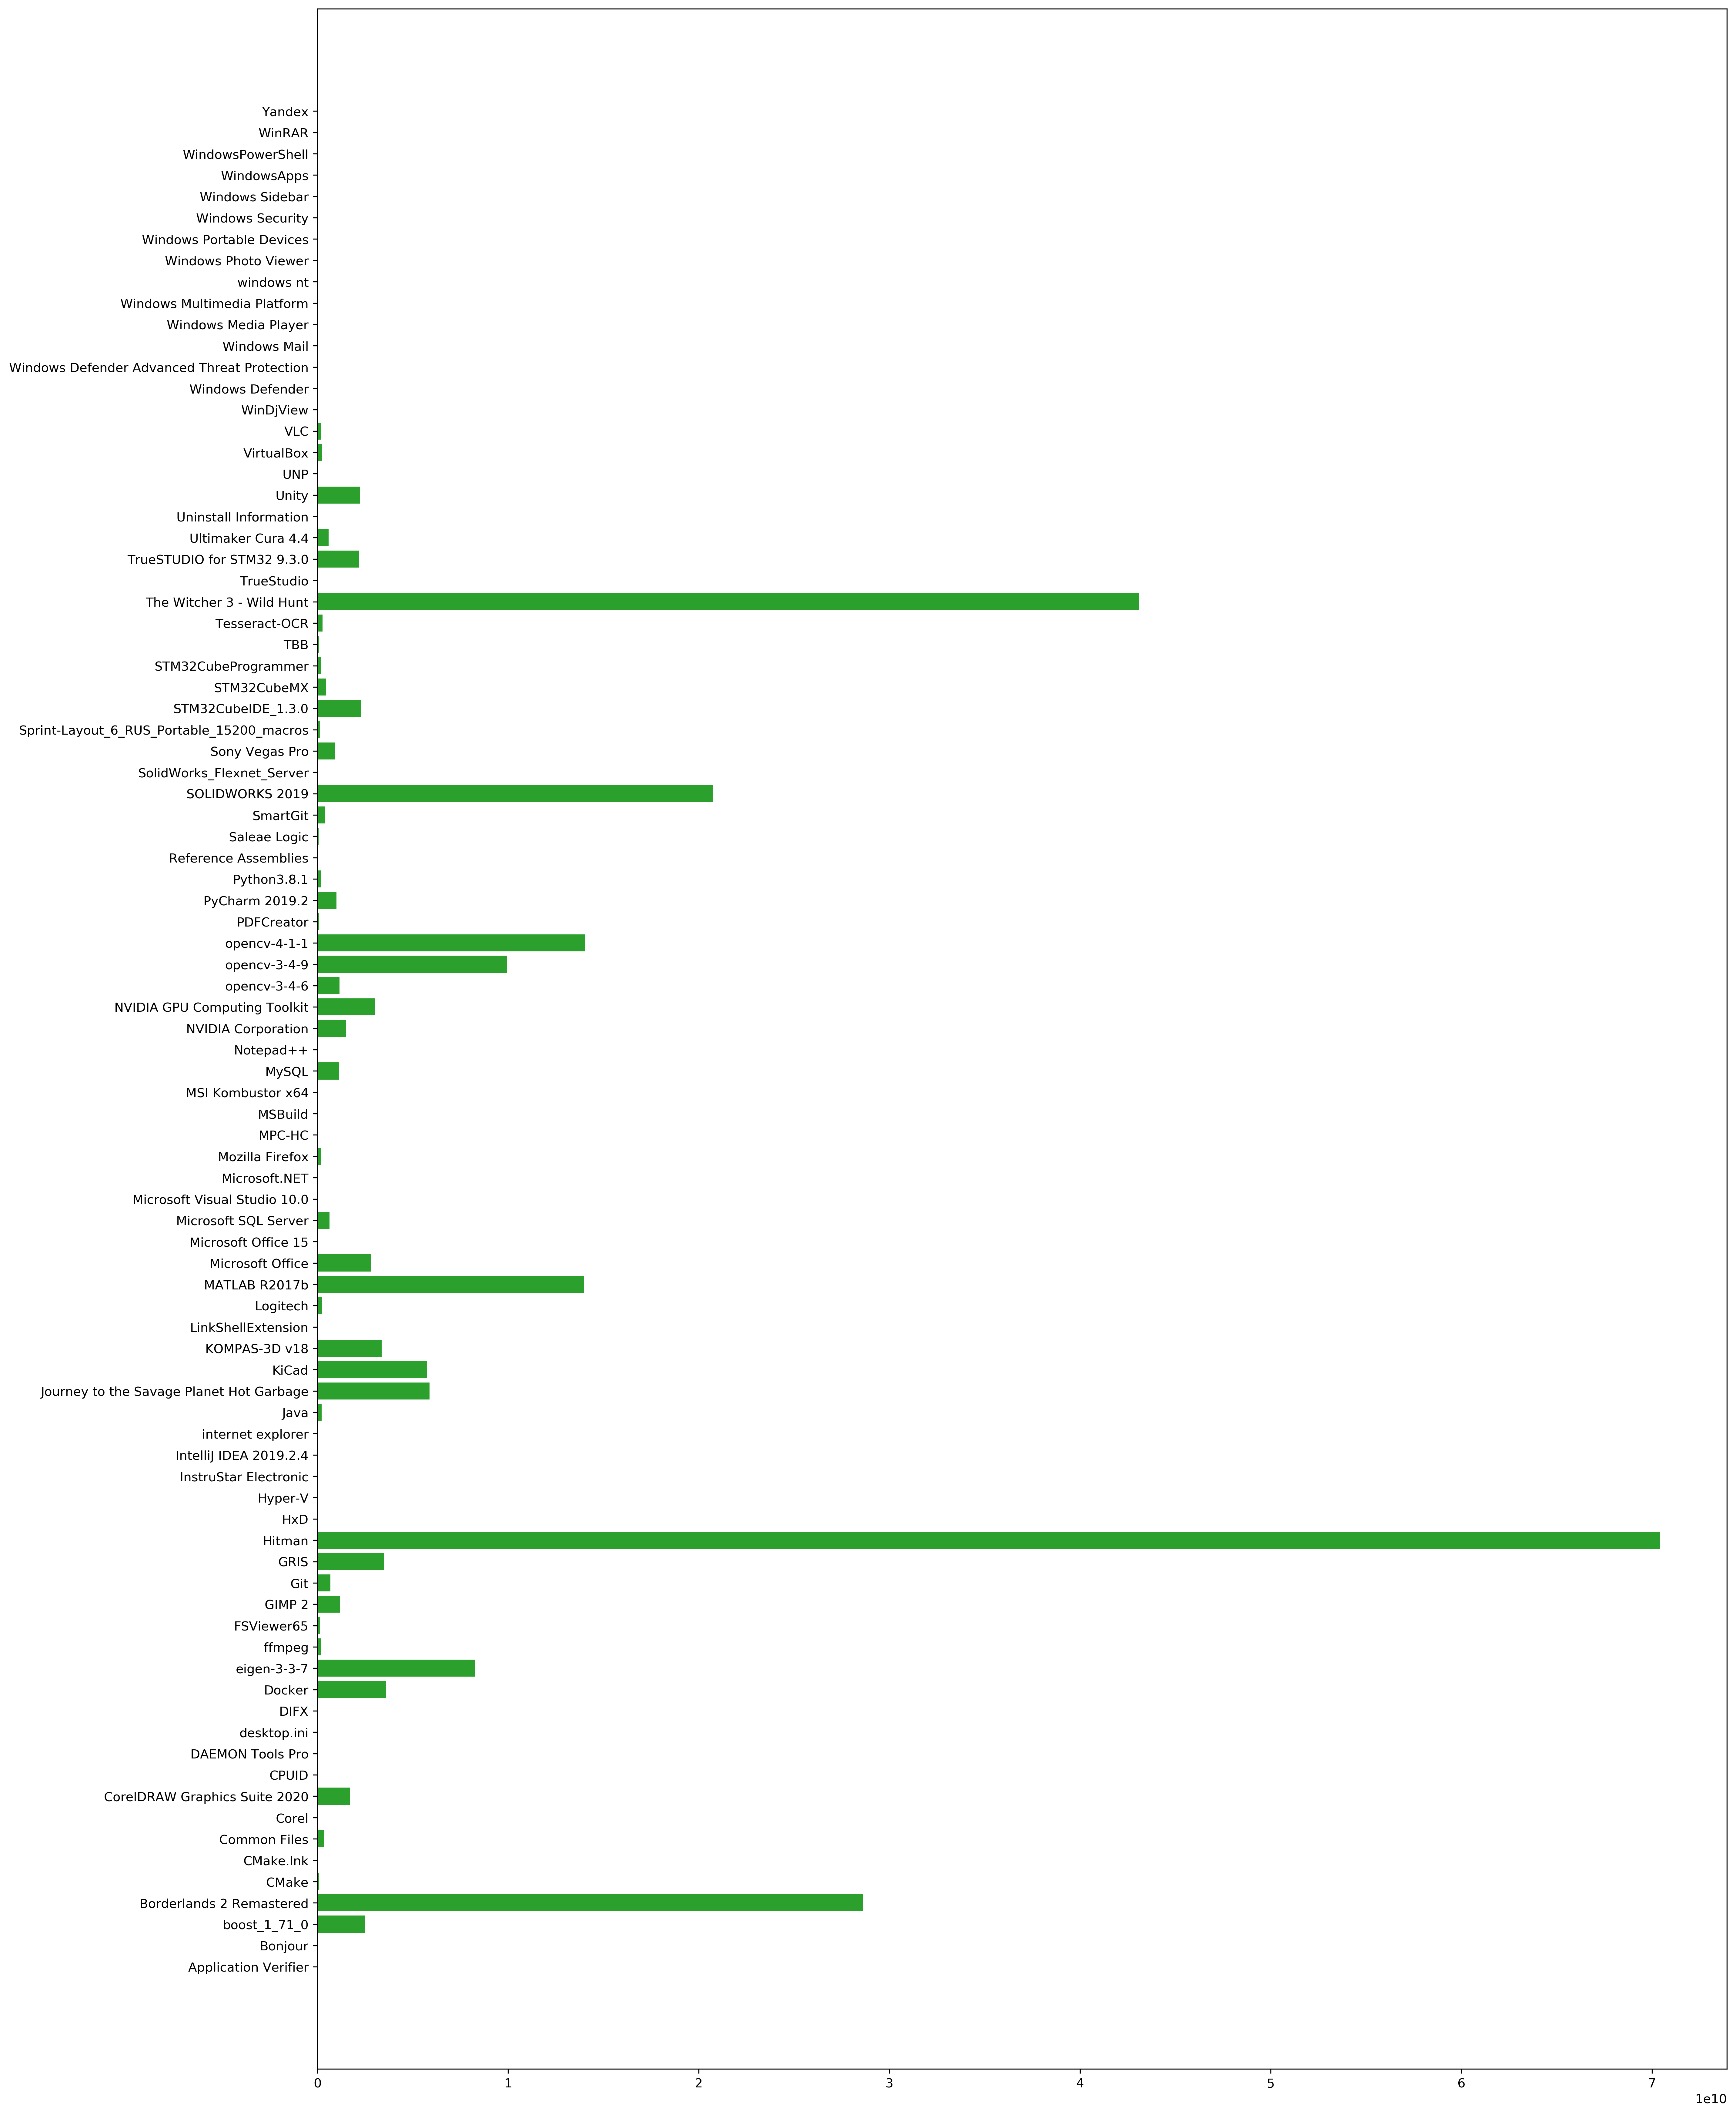

In [4]:
plt.figure(figsize=(20,30), dpi = 300)
sizes = [int(x[0]) for x in items[path].values()]
y_pos = np.arange(N)

print(y_pos)
print(sizes)

print(len(y_pos), len(sizes), len(items[path].keys()))

colors = np.random.rand(N)

plt.barh(y_pos, sizes, color='C2')
plt.yticks(y_pos, items[path].keys())
plt.show()

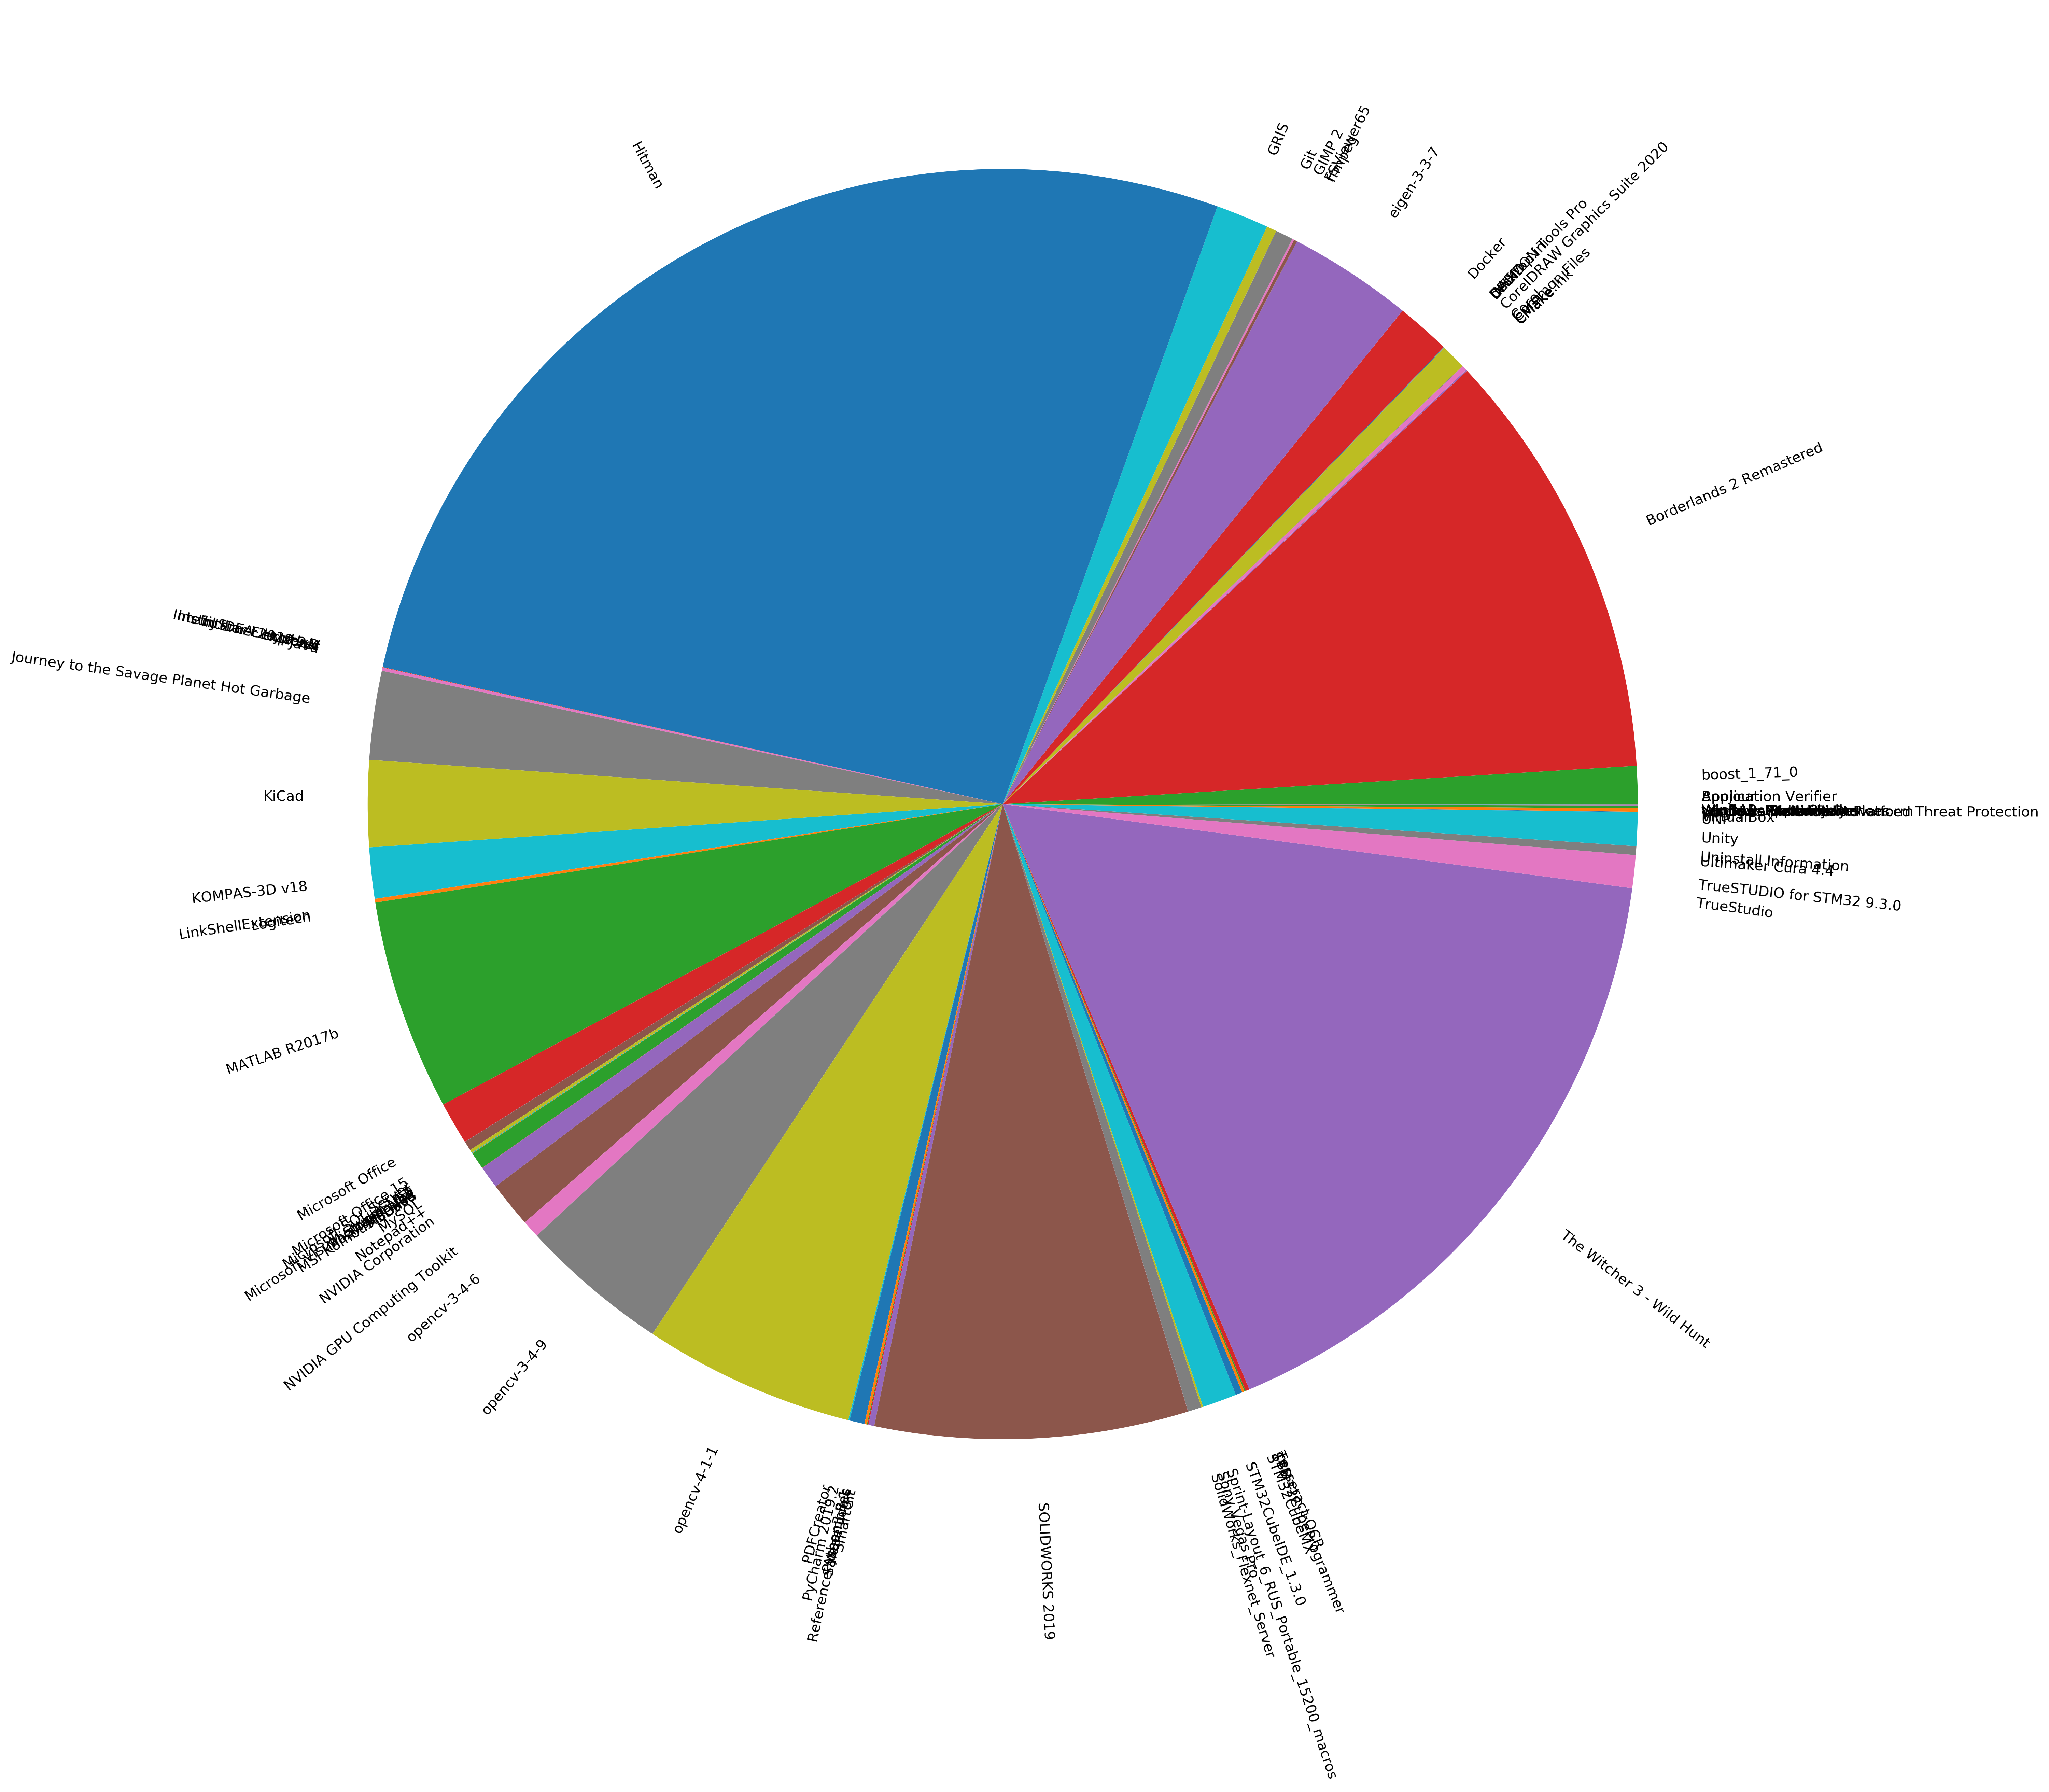

In [5]:
plt.figure(figsize=(20,30), dpi = 300)

plt.pie(sizes, labels = items[path].keys(), labeldistance = 1.1, rotatelabels = True)
plt.show()

In [6]:
# больше гигабайта только

most_significant = {k:v for k,v in items[path].items() if int(v[0]) > 1024*1024*1024}
pprint(most_significant)


{'Borderlands 2 Remastered': (28623938987, 1591280257.1955278),
 'CorelDRAW Graphics Suite 2020': (1692920254, 1591442405.3866303),
 'Docker': (3586518205, 1582015815.8619046),
 'GIMP 2': (1173335475, 1590604949.844264),
 'GRIS': (3494423083, 1590957201.8276806),
 'Hitman': (70419784175, 1590181531.1494708),
 'Journey to the Savage Planet Hot Garbage': (5875684779, 1591297663.573007),
 'KOMPAS-3D v18': (3370799247, 1581757874.998273),
 'KiCad': (5730529227, 1585254453.3843176),
 'MATLAB R2017b': (13975985888, 1590315947.9052224),
 'Microsoft Office': (2818981461, 1591645757.0807316),
 'MySQL': (1135102554, 1588181470.564992),
 'NVIDIA Corporation': (1489736804, 1586530751.6088216),
 'NVIDIA GPU Computing Toolkit': (3022259930, 1585908497.1280599),
 'SOLIDWORKS 2019': (20735810290, 1581249795.7071426),
 'STM32CubeIDE_1.3.0': (2274315797, 1587549953.7905324),
 'The Witcher 3 - Wild Hunt': (43089505318, 1581282864.4225059),
 'TrueSTUDIO for STM32 9.3.0': (2178219242, 1584738455.7722702),


In [7]:
print(len(most_significant))

24


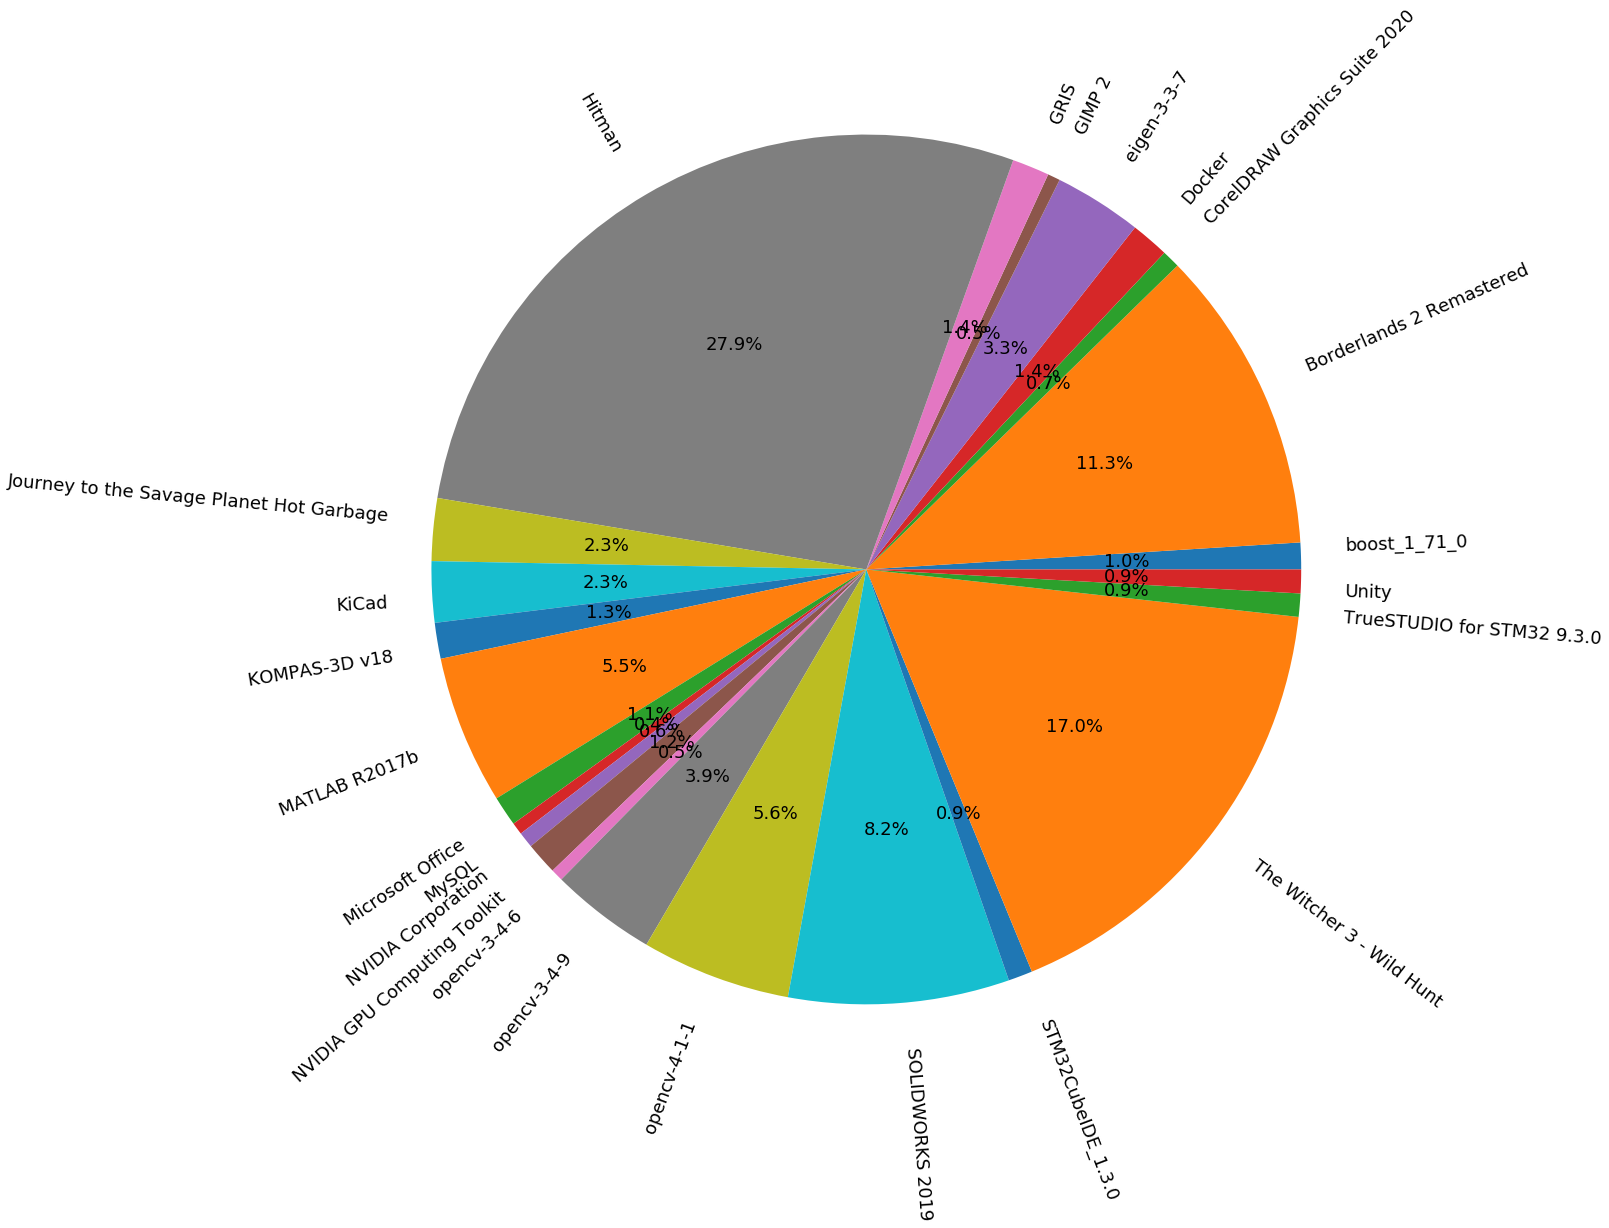

In [8]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 18.0

sizes = [int(x[0]) for x in most_significant.values()]

plt.figure(figsize=(20,20))
plt.pie(sizes, labels = most_significant.keys(), labeldistance = 1.1, rotatelabels = True, autopct='%1.1f%%')
plt.show()

In [9]:
path2 = "C:/Program Files (x86)/"
items2 = file_size.explore_dir(path2)
# pprint(items)


file_size.pretty_print_info(items2[path2])

Searching for  C_Program Files (x86)_ 

desktop.ini               ini     0.169  Kib
Microsoft.NET             net     8.568  Mib
--------------------------------------------
Adobe                     dir     177.6  Mib
Advanced IP Scanner       dir     35.35  Mib
Application Verifier      dir     295.7  Kib
Arduino                   dir     453.5  Mib
Bonjour                   dir     616.3  Kib
Common Files              dir     491.8  Mib
Corel                     dir     18.47  Mib
DeviceManager             dir     10.11  Mib
DVDVideoSoft              dir     10.52  Mib
Epic Games                dir     831.2  Mib
Far Cry 3                 dir     11.05  Gib
FastStone Capture         dir     10.06  Mib
FlashLoader               dir     83.83  Mib
Foxit Software            dir     698.6  Mib
GPU-Z                     dir     6.249  Mib
gs                        dir     23.73  Mib
InstallShield Installa    dir     225.4  Kib
Internet Explorer         dir     1.112  Mib
Logitech       

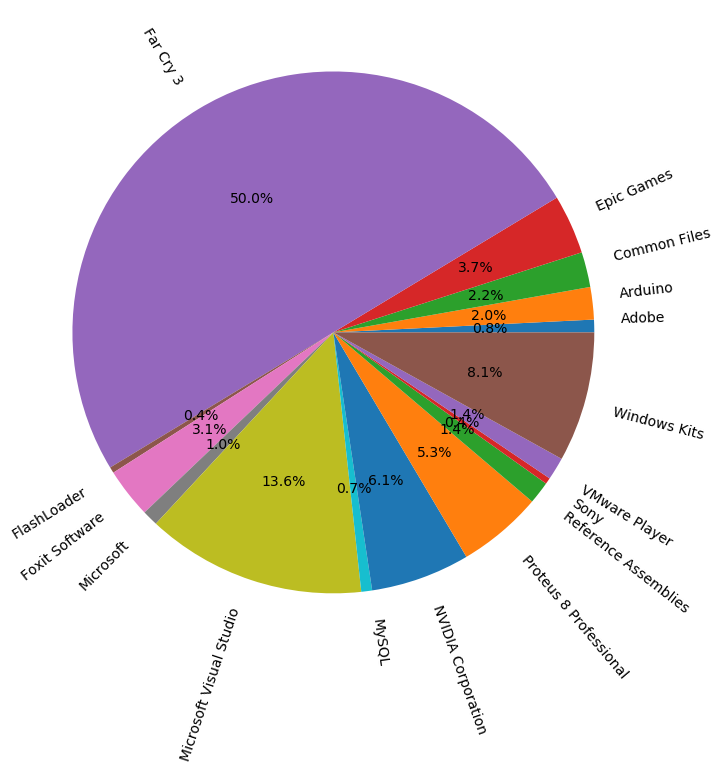

In [10]:
# Больше 64 Мб

most_significant = {k:v[0] for k,v in items2[path2].items() if int(v[0]) > 64*1024*1024}

sizes = [int(x) for x in most_significant.values()]

mpl.rcParams['font.size'] = 14.0
plt.figure(figsize=(12,12))
plt.pie(sizes, labels = most_significant.keys(), labeldistance = 1.1, rotatelabels = True, autopct='%1.1f%%')
#plt.pie(items.values(), labels = items.keys(), labeldistance = 1.1, rotatelabels = True, autopct='%1.1f%%')
plt.show()